In [1]:
# Import all required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Load Dataset
df = pd.read_csv("case2_banking_kmeans_1000 .csv")
df.head()

,AvgTransactionAmount,TransactionsPerMonth,TransactionFrequency,AvgTimeGapDays
0,987,24,1,5
1,1321,12,1,6
2,1961,20,1,12
3,1588,30,1,10
4,855,23,2,6


In [5]:
# Feature
X=df[["AvgTransactionAmount","TransactionsPerMonth","TransactionFrequency","AvgTimeGapDays"]]

In [6]:
# Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

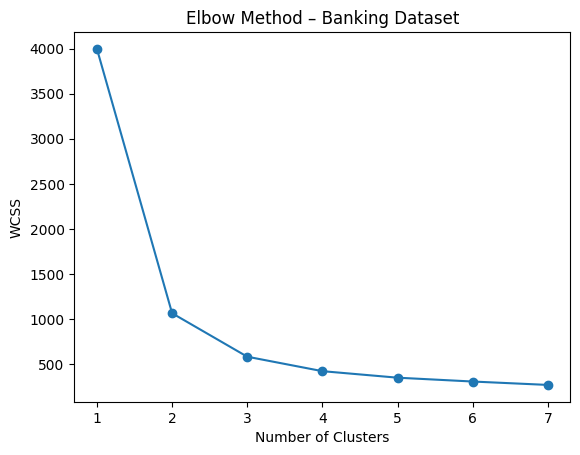

In [8]:
# Elbow Method

wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method – Banking Dataset")
plt.show()


In [10]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()

,AvgTransactionAmount,TransactionsPerMonth,TransactionFrequency,AvgTimeGapDays,Cluster
0,987,24,1,5,2
1,1321,12,1,6,2
2,1961,20,1,12,2
3,1588,30,1,10,2
4,855,23,2,6,2


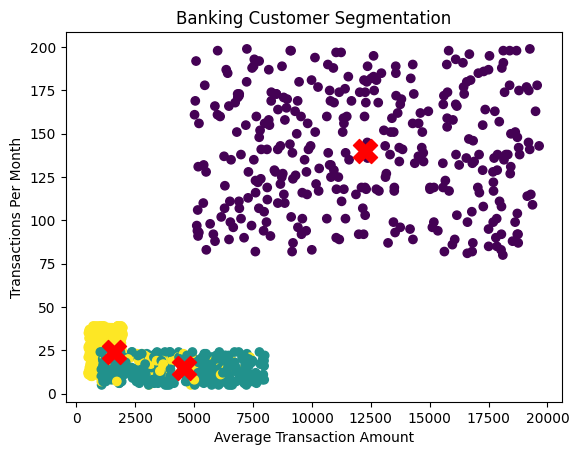

In [13]:
# Visualization
# Inverse transform centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    df["AvgTransactionAmount"],
    df["TransactionsPerMonth"],
    c=df["Cluster"]
)
# Plot centroids
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1],  
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)
plt.xlabel("Average Transaction Amount")
plt.ylabel("Transactions Per Month")
plt.title("Banking Customer Segmentation")
plt.show()
